# 📊 Dataset Information

**Note:** The dataset for this project is **not included in this repository** to keep the repository lightweight.  

You can download the dataset from **Kaggle** using the link below:  

[Download The Loan Approval Dataset](https://www.kaggle.com/datasets/amineipad/loan-approval-dataset/data)  

Please make sure to place the downloaded CSV file in the same directory as this notebook before running any code.

# Importing

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

/kaggle/input/loan-approval-dataset/loanapproval.csv


## Import CSV And convert to DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/loan-approval-dataset/loanapproval.csv')

# Preprocessing

## Frist five row

In [3]:
df.head()

,applicant_id,age,gender,marital_status,annual_income,loan_amount,credit_score,num_dependents,existing_loans_count,employment_status,loan_approved
0,1,59,Male,Divorced,100073,7169,793,1,1,Unemployed,1
1,2,49,Male,Married,112197,23556,789,0,2,Employed,1
2,3,35,Male,Divorced,84429,27052,372,1,4,Unemployed,0
3,4,63,Female,Single,124195,11313,808,3,4,Self-employed,1
4,5,28,Female,Married,81627,13315,689,0,1,Unemployed,1


## last Five row

In [4]:
df.tail()

,applicant_id,age,gender,marital_status,annual_income,loan_amount,credit_score,num_dependents,existing_loans_count,employment_status,loan_approved
995,996,53,Female,Married,135598,6014,767,3,2,Employed,1
996,997,22,Male,Single,139028,15103,662,0,0,Self-employed,1
997,998,34,Female,Married,147517,21986,582,0,2,Employed,1
998,999,60,Female,Divorced,73161,49781,635,4,0,Unemployed,1
999,1000,60,Female,Single,141316,35471,461,1,1,Unemployed,1


## Shape of our dataset

In [5]:
df.shape

(1000, 11)

## List out all columns

In [6]:
df.columns

Index(['applicant_id', 'age', 'gender', 'marital_status', 'annual_income',
       'loan_amount', 'credit_score', 'num_dependents', 'existing_loans_count',
       'employment_status', 'loan_approved'],
      dtype='object')

## Datatype of each columns

In [7]:
df.dtypes

applicant_id             int64
age                      int64
gender                  object
marital_status          object
annual_income            int64
loan_amount              int64
credit_score             int64
num_dependents           int64
existing_loans_count     int64
employment_status       object
loan_approved            int64
dtype: object

## Information of all Columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   applicant_id          1000 non-null   int64 
 1   age                   1000 non-null   int64 
 2   gender                1000 non-null   object
 3   marital_status        1000 non-null   object
 4   annual_income         1000 non-null   int64 
 5   loan_amount           1000 non-null   int64 
 6   credit_score          1000 non-null   int64 
 7   num_dependents        1000 non-null   int64 
 8   existing_loans_count  1000 non-null   int64 
 9   employment_status     1000 non-null   object
 10  loan_approved         1000 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 86.1+ KB


## Check Null Value

In [9]:
df.isnull().sum()

applicant_id            0
age                     0
gender                  0
marital_status          0
annual_income           0
loan_amount             0
credit_score            0
num_dependents          0
existing_loans_count    0
employment_status       0
loan_approved           0
dtype: int64

## Check Dupicate Value

In [10]:
df.duplicated().sum()

np.int64(0)

## Summary

In [11]:
df.describe()

,applicant_id,age,annual_income,loan_amount,credit_score,num_dependents,existing_loans_count,loan_approved
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,42.515000,81972.972000,27244.866000,576.125000,1.97700,2.042000,0.729000
std,288.819436,12.611059,37547.255418,12822.752877,155.921483,1.41862,1.413589,0.444699
min,1.000000,21.000000,20155.000000,5082.000000,300.000000,0.00000,0.000000,0.000000
25%,250.750000,32.000000,48913.250000,16587.500000,443.750000,1.00000,1.000000,0.000000
50%,500.500000,43.000000,82050.000000,27041.500000,573.500000,2.00000,2.000000,1.000000
75%,750.250000,53.000000,113556.000000,37939.250000,713.250000,3.00000,3.000000,1.000000
max,1000.000000,64.000000,149951.000000,49864.000000,849.000000,4.00000,4.000000,1.000000


# EDA

In [12]:
def show_fig():
    plt.tight_layout()
    plt.show()

plot_no = 1

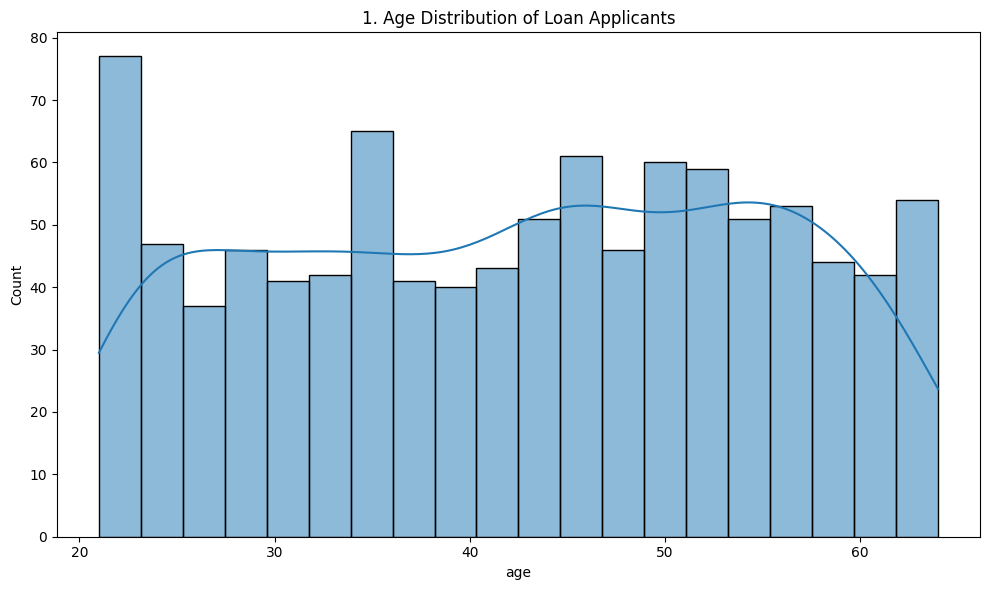

In [13]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title(f'{plot_no}. Age Distribution of Loan Applicants')
show_fig()
plot_no += 1


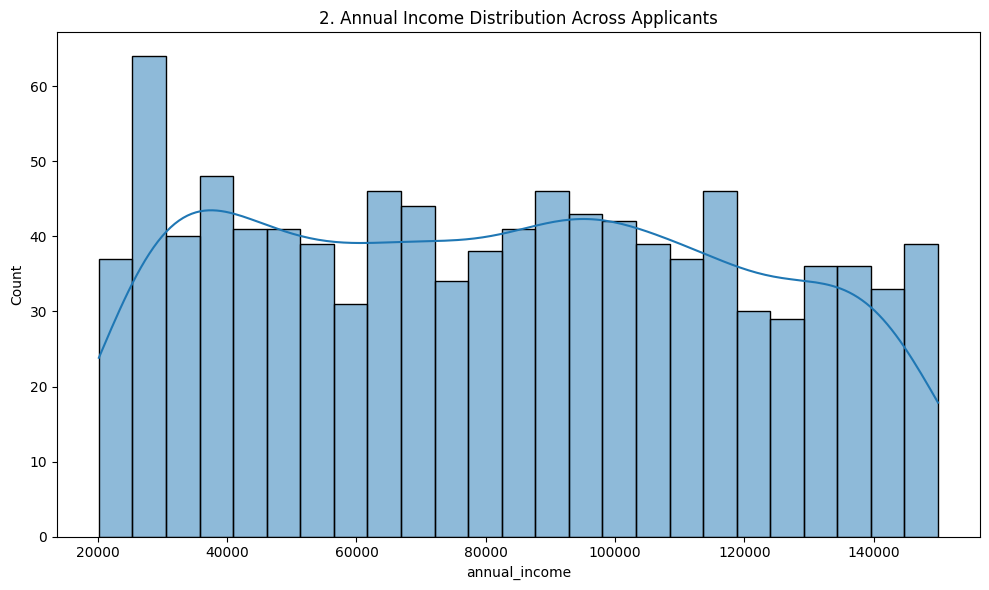

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df['annual_income'], bins=25, kde=True)
plt.title(f'{plot_no}. Annual Income Distribution Across Applicants')
show_fig()
plot_no += 1


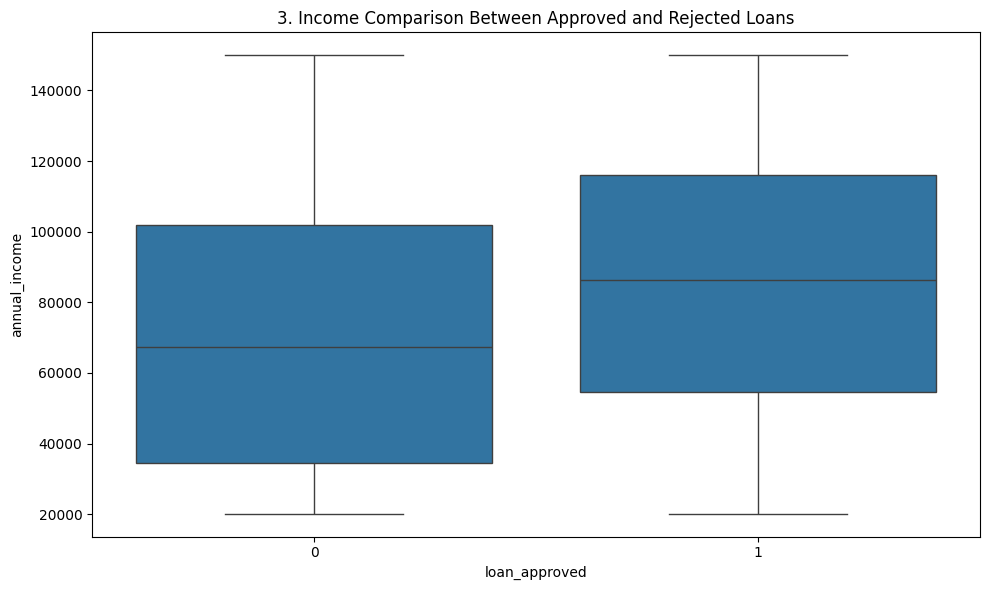

In [15]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='loan_approved', y='annual_income', data=df)
plt.title(f'{plot_no}. Income Comparison Between Approved and Rejected Loans')
show_fig()
plot_no += 1


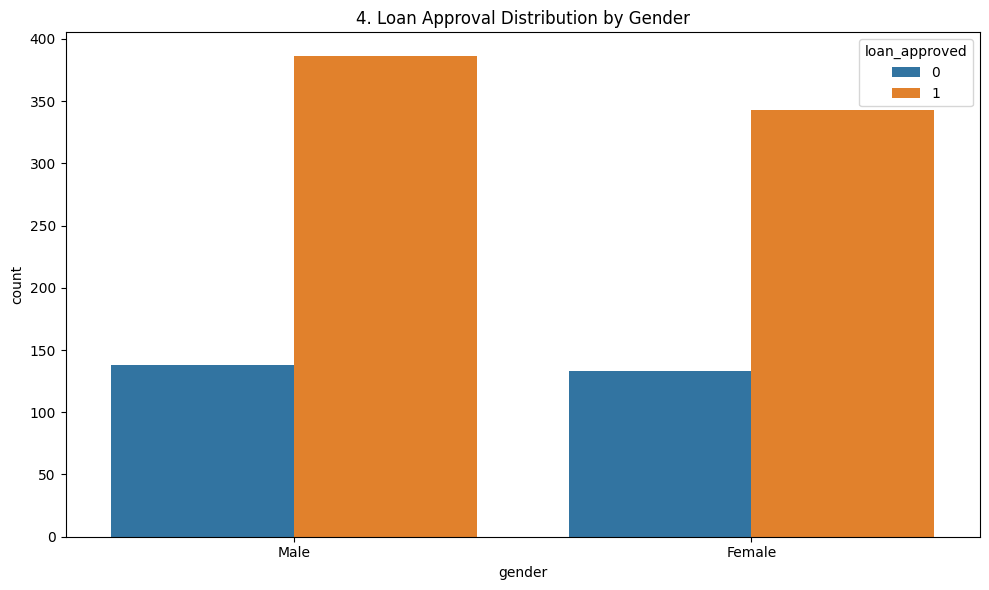

In [16]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Loan Approval Distribution by Gender')
show_fig()
plot_no += 1


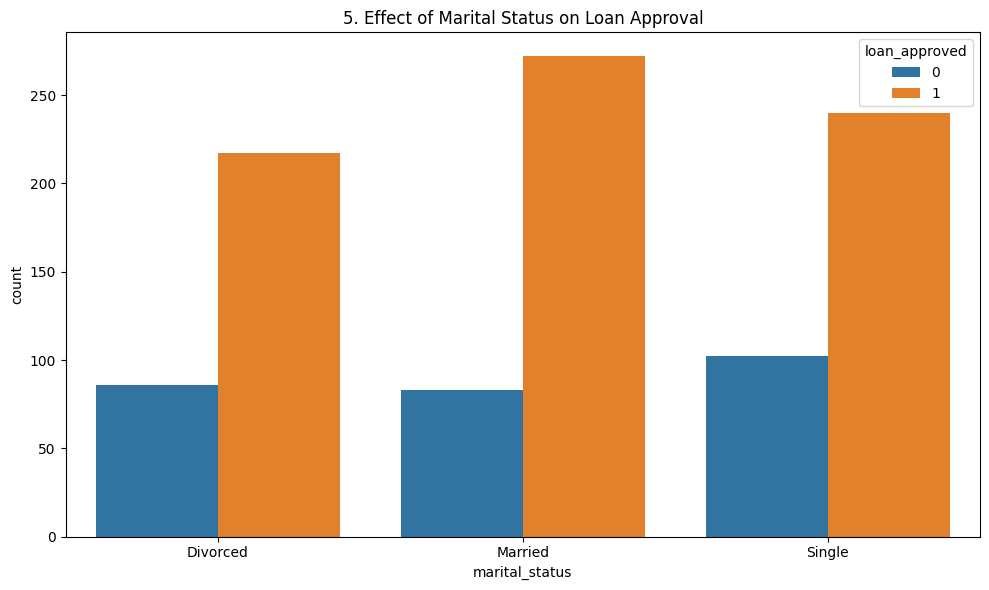

In [17]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='marital_status', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Effect of Marital Status on Loan Approval')
show_fig()
plot_no += 1


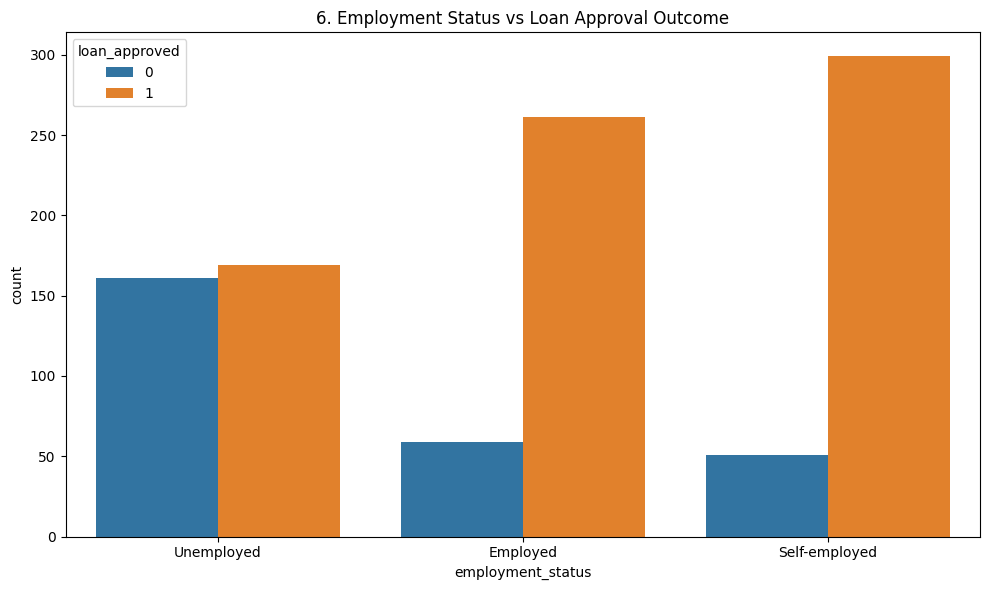

In [18]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='employment_status', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Employment Status vs Loan Approval Outcome')
show_fig()
plot_no += 1


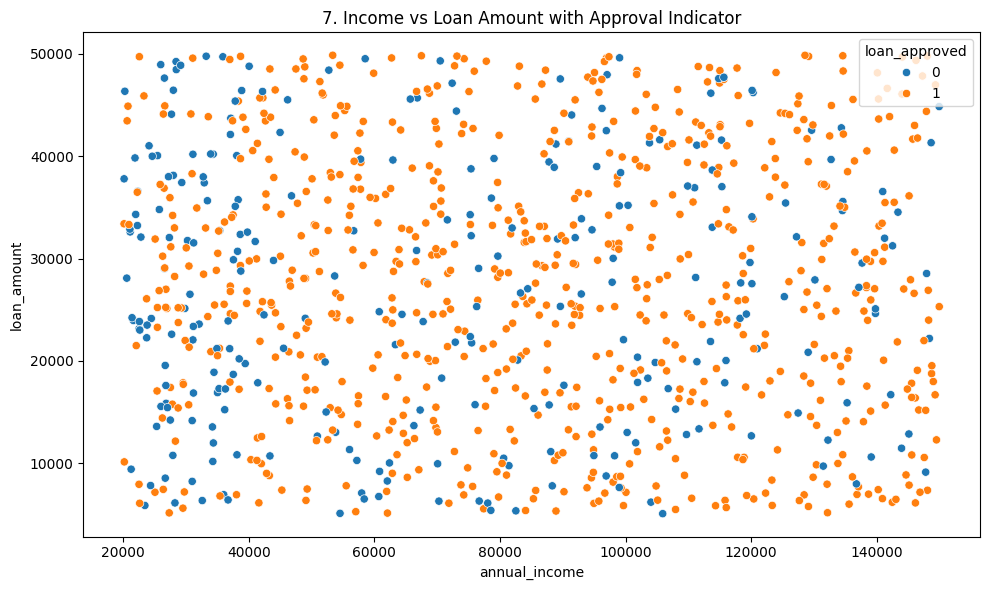

In [19]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='loan_amount', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Income vs Loan Amount with Approval Indicator')
show_fig()
plot_no += 1


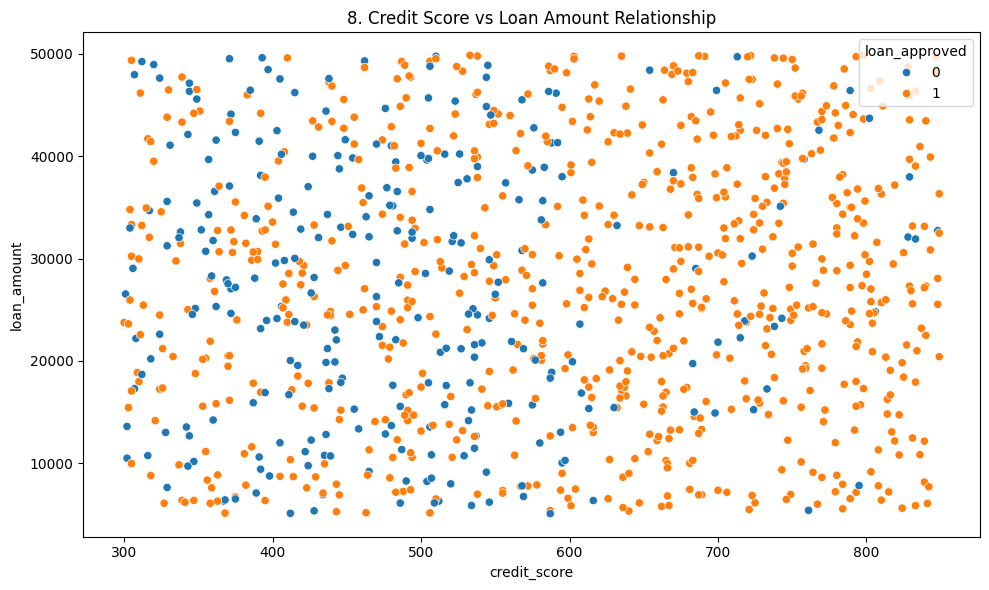

In [20]:
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x='credit_score', y='loan_amount', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Credit Score vs Loan Amount Relationship')
show_fig()
plot_no += 1


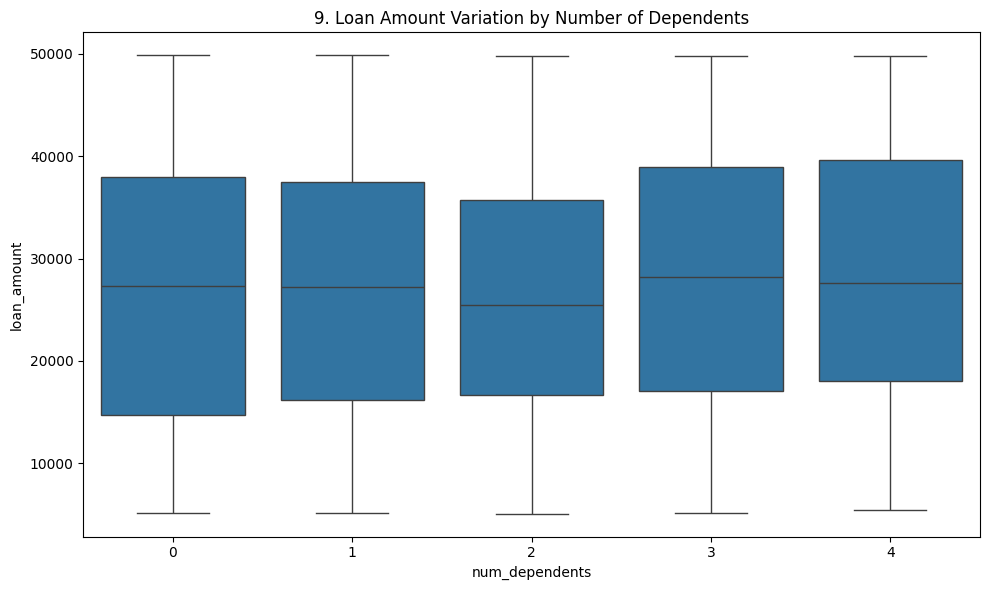

In [21]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='num_dependents', y='loan_amount', data=df)
plt.title(f'{plot_no}. Loan Amount Variation by Number of Dependents')
show_fig()
plot_no += 1


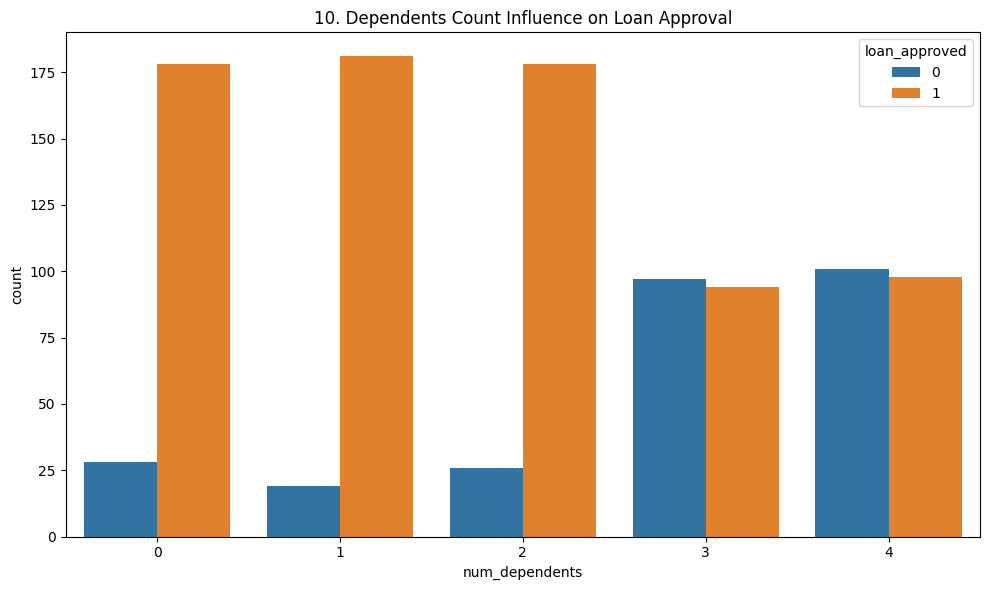

In [22]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='num_dependents', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Dependents Count Influence on Loan Approval')
show_fig()
plot_no += 1


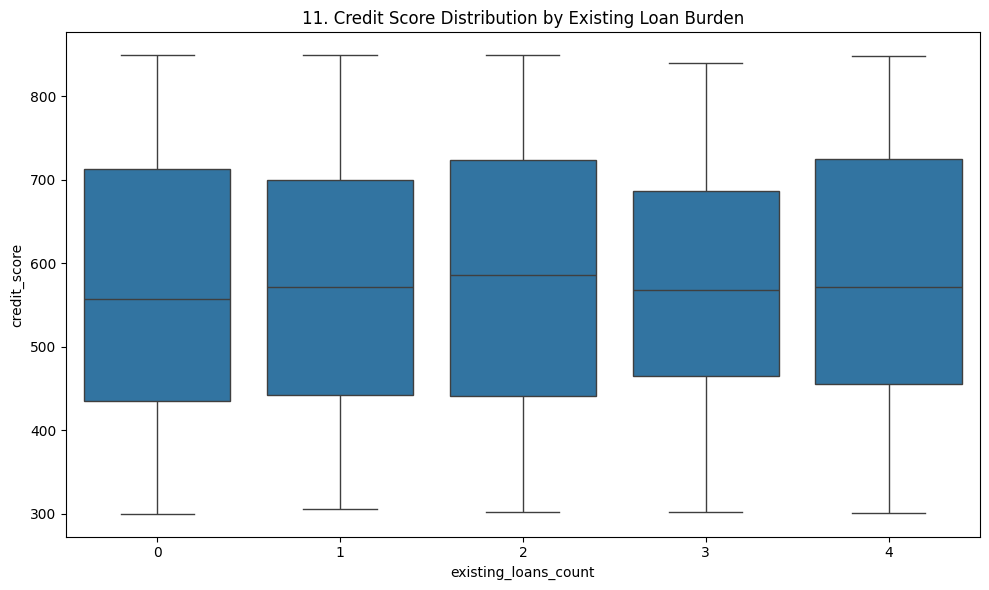

In [23]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='existing_loans_count', y='credit_score', data=df)
plt.title(f'{plot_no}. Credit Score Distribution by Existing Loan Burden')
show_fig()
plot_no += 1


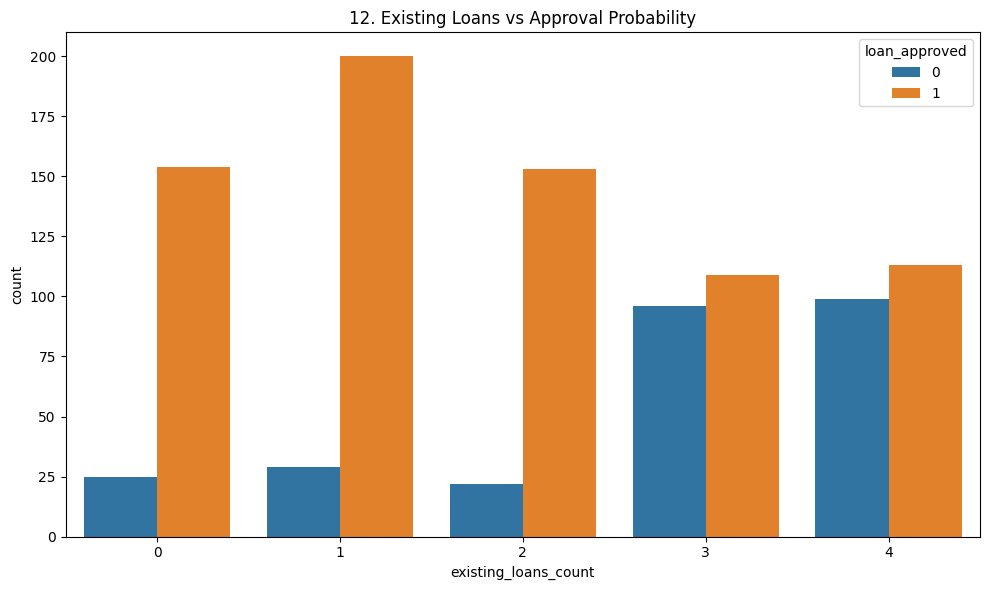

In [24]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='existing_loans_count', hue='loan_approved', data=df)
plt.title(f'{plot_no}. Existing Loans vs Approval Probability')
show_fig()
plot_no += 1


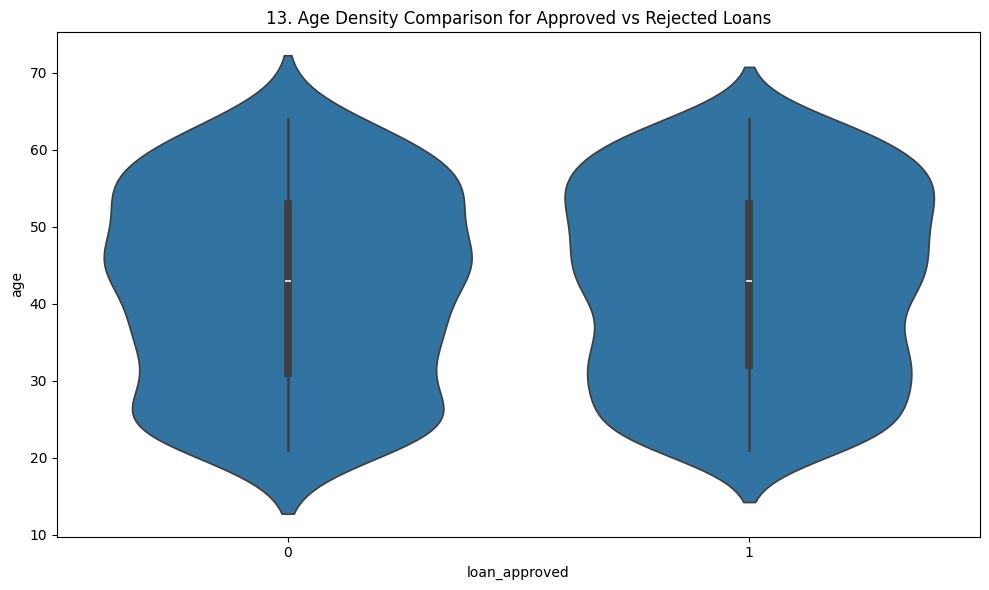

In [25]:
fig = plt.figure(figsize=(10,6))
sns.violinplot(x='loan_approved', y='age', data=df)
plt.title(f'{plot_no}. Age Density Comparison for Approved vs Rejected Loans')
show_fig()
plot_no += 1


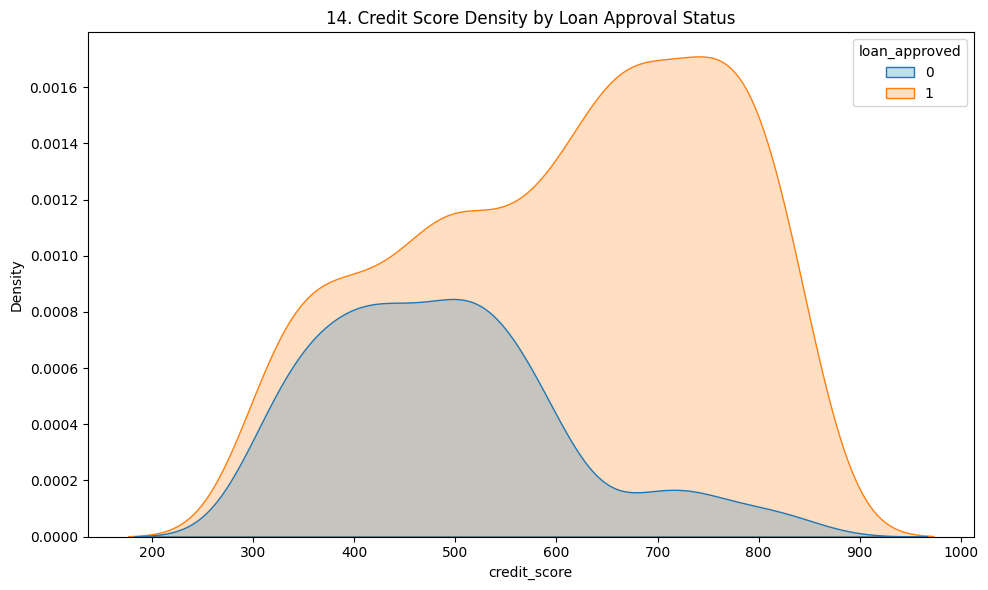

In [26]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='credit_score', hue='loan_approved', fill=True)
plt.title(f'{plot_no}. Credit Score Density by Loan Approval Status')
show_fig()
plot_no += 1


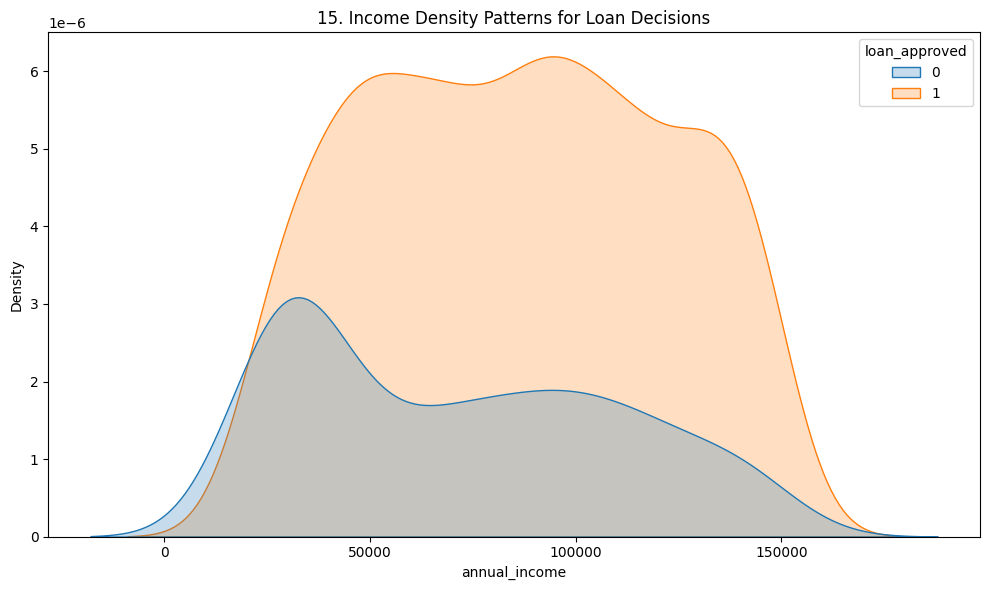

In [27]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='annual_income', hue='loan_approved', fill=True)
plt.title(f'{plot_no}. Income Density Patterns for Loan Decisions')
show_fig()
plot_no += 1


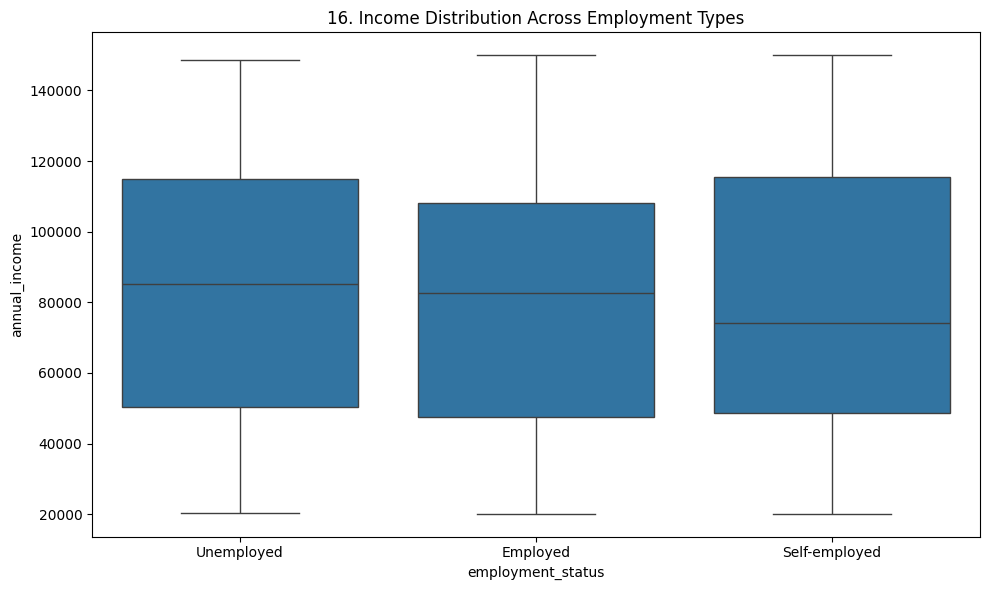

In [28]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='employment_status', y='annual_income', data=df)
plt.title(f'{plot_no}. Income Distribution Across Employment Types')
show_fig()
plot_no += 1

Text(0.5, 1.0, '17. Correlation Heatmap of Key Financial Attributes')

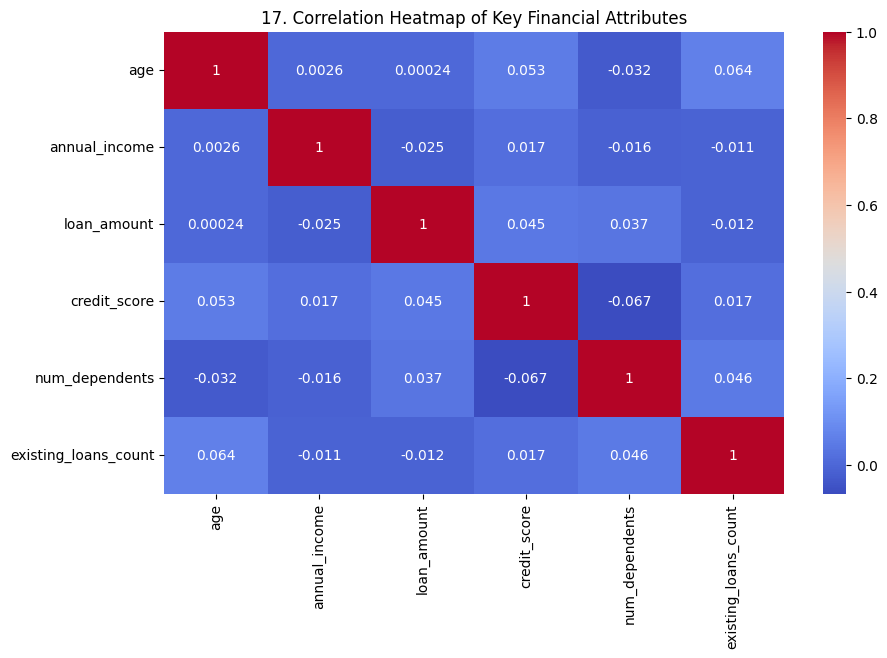

In [29]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df[['age','annual_income','loan_amount','credit_score','num_dependents','existing_loans_count']].corr(), annot=True, cmap='coolwarm')
plt.title(f'{plot_no}. Correlation Heatmap of Key Financial Attributes')

# Model Training

## Select numerical features and target

In [30]:
X = df[['age','annual_income','loan_amount','credit_score','num_dependents','existing_loans_count']]
y = df['loan_approved']

## Split data into train and test sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Apply feature scaling

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Logistic Regression model

In [33]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

## Generate predictions

In [34]:
y_pred = model.predict(X_test_scaled)

## Print model accuracy

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 80.5 %


## Plot confusion matrix

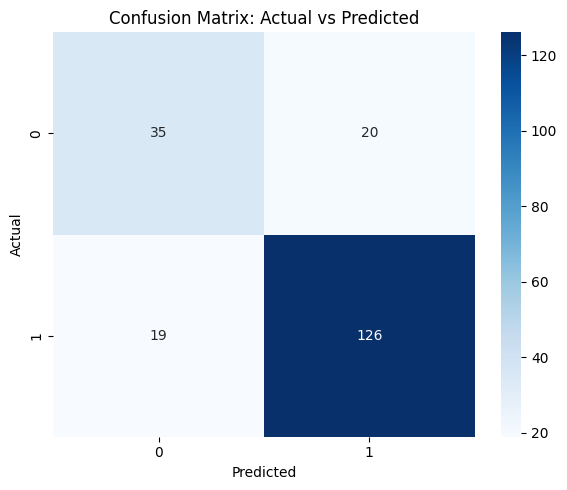

In [36]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()